<a href="https://colab.research.google.com/github/pkarw-25/Task1_list_set_dictionary/blob/main/Task_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Netflix**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
netflix_data=pd.read_csv('netflix.csv')

In [22]:
netflix_data.head()

,title,genre,language,imdb_score,premiere,runtime,year
0,Notes for My Son,Drama,Spanish,6.3,11/24/2020,83,2020
1,"To Each, Her Own",Romantic comedy,French,5.3,6/24/2018,95,2018
2,The Lovebirds,Romantic comedy,English,6.1,5/22/2020,87,2020
3,The Perfection,Horror-thriller,English,6.1,5/24/2019,90,2019
4,Happy Anniversary,Romantic comedy,English,5.8,3/30/2018,78,2018


In [23]:
netflix_data.tail()

,title,genre,language,imdb_score,premiere,runtime,year
578,Rolling Thunder Revue: A bob Dylan Story by Ma...,Documentary,English,7.6,6/12/2019,144,2019
579,Freaks: You're One of Us,Supernatural drama,German,5.4,9/2/2020,92,2020
580,Squared Love,Romantic comedy,Polish,5.0,2/11/2021,102,2021
581,My Own Man,Documentary,English,6.4,12/13/2014,81,2014
582,Biggie: I Got a Story to Tell,Documentary,English,6.9,3/1/2021,97,2021


In [24]:
netflix_data.columns.values

array(['title', 'genre', 'language', 'imdb_score', 'premiere', 'runtime',
       'year'], dtype=object)

In [25]:
netflix_data.isnull().sum()

title         0
genre         0
language      0
imdb_score    0
premiere      0
runtime       0
year          0
dtype: int64

In [26]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       583 non-null    object 
 1   genre       583 non-null    object 
 2   language    583 non-null    object 
 3   imdb_score  583 non-null    float64
 4   premiere    583 non-null    object 
 5   runtime     583 non-null    int64  
 6   year        583 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 32.0+ KB


array([[<Axes: title={'center': 'imdb_score'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >]], dtype=object)

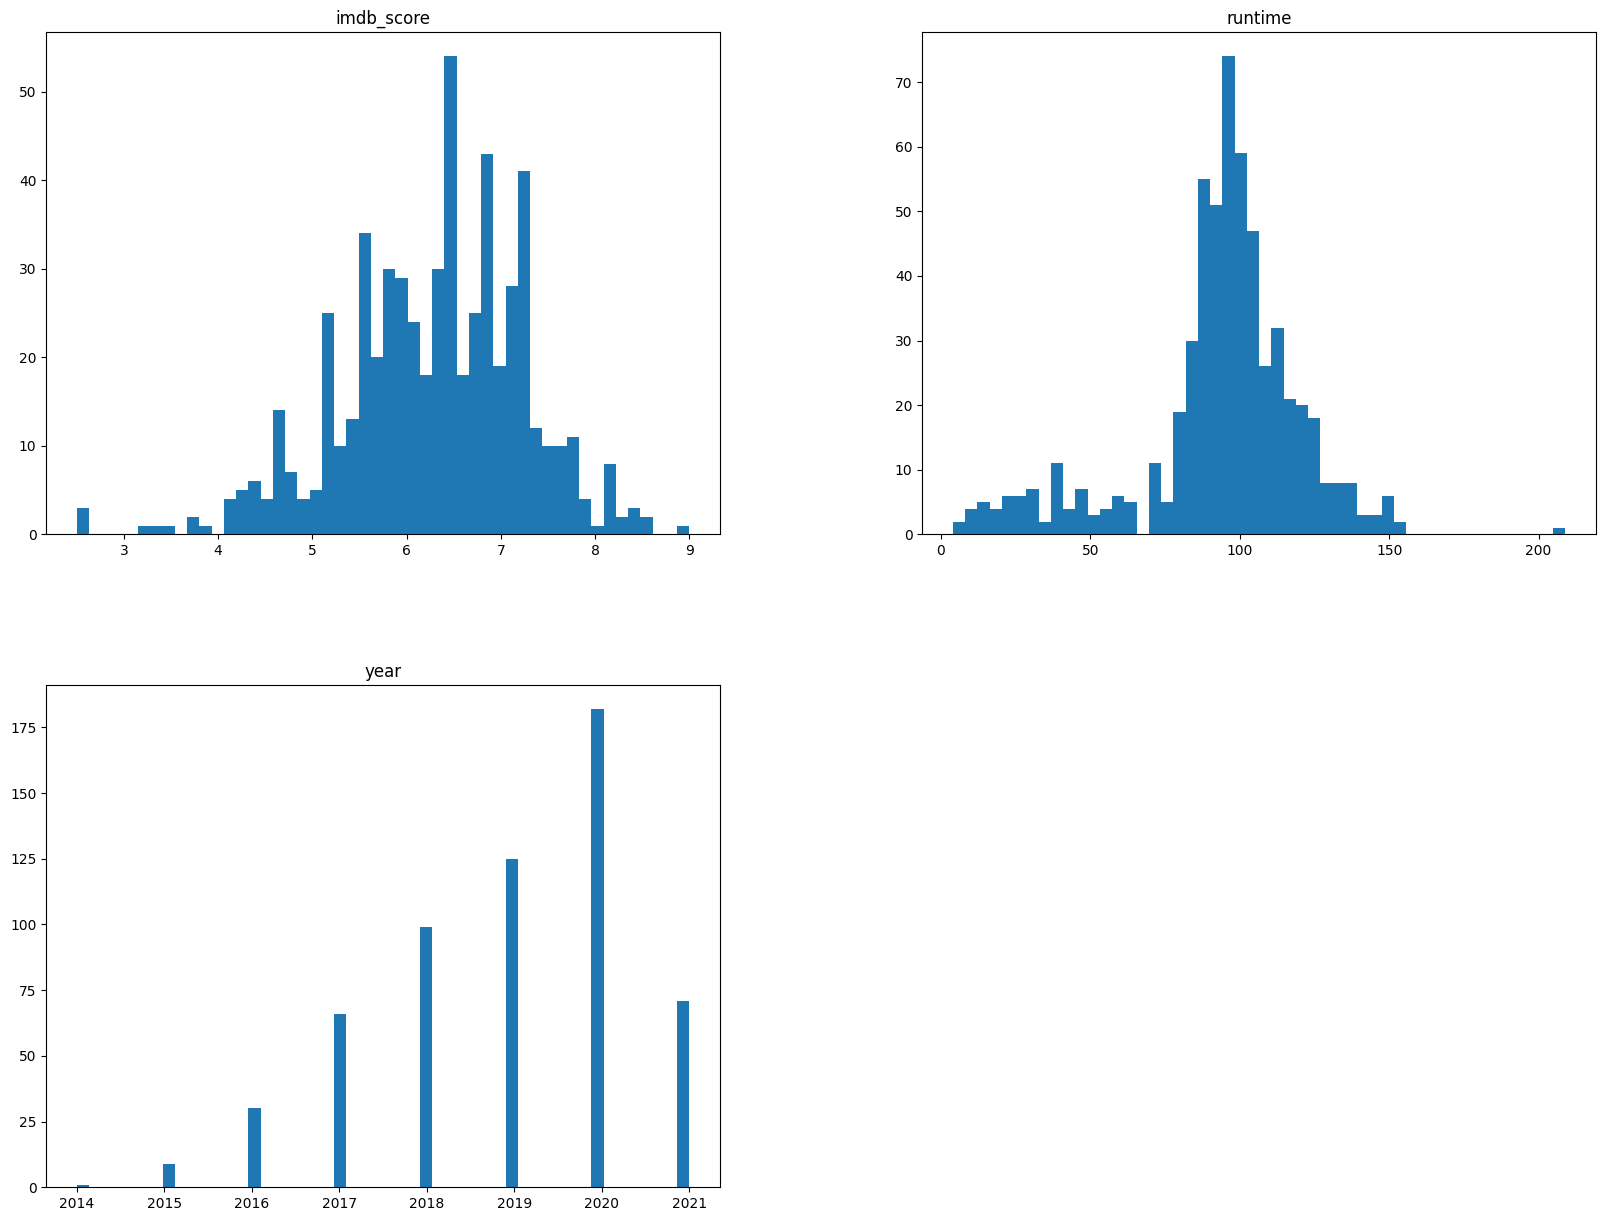

In [27]:
netflix_data.hist(bins=50,grid=False,figsize=(20,15))
# plt.show()

In [28]:
questions=['1.What are the top 5 highest-rated movies?',
'2. Which genres have the most movies?',
'3. What is the average IMDb score for each genre?',
'4. How many movies are there per year?',
'5. What is the average runtime of movies in the dataset?']
questions

['1.What are the top 5 highest-rated movies?',
 '2. Which genres have the most movies?',
 '3. What is the average IMDb score for each genre?',
 '4. How many movies are there per year?',
 '5. What is the average runtime of movies in the dataset?']

In [29]:
# Top 5 highest-rated movies
top_5_movies = netflix_data.nlargest(5, 'imdb_score')
top_5_movies[['title', 'imdb_score']]


,title,imdb_score
285,David Attenborough: A Life on Our Planet,9.0
268,Emicida: AmarElo - It's All For Yesterday,8.6
72,Springsteen on Broadway,8.5
214,Winter on Fire: Ukraine's Fight for Freedom,8.4
410,Ben Platt: Live from Radio City Music Hall,8.4


<ipython-input-31-eb7e1714af4a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_5_movies, palette='viridis')


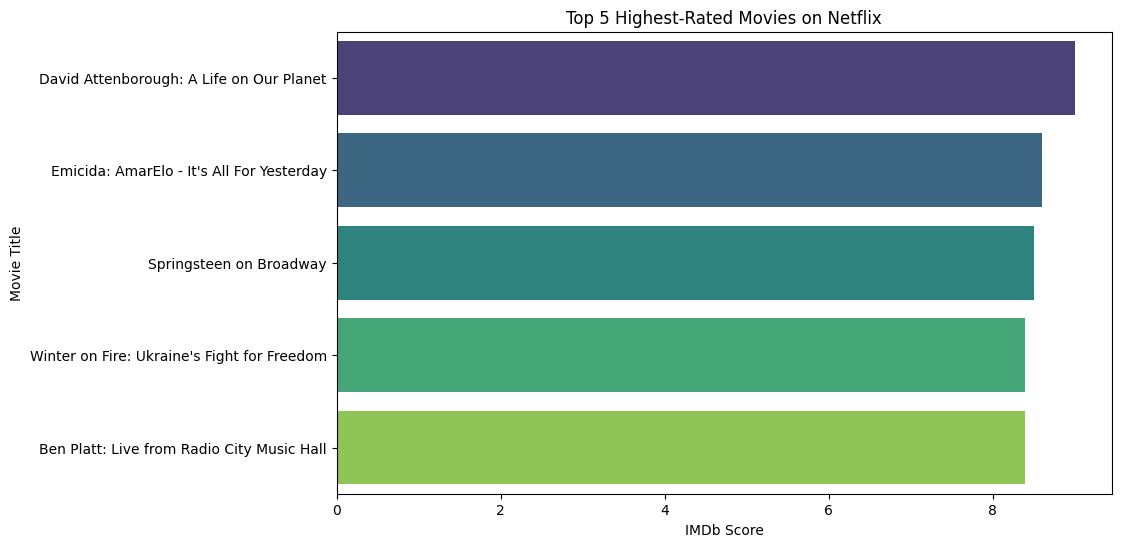

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
top_5_movies = netflix_data.nlargest(5, 'imdb_score')[['title', 'imdb_score']]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y='title', data=top_5_movies, palette='viridis')
plt.xlabel('IMDb Score')
plt.ylabel('Movie Title')
plt.title('Top 5 Highest-Rated Movies on Netflix')
plt.show()


In [32]:
# Count of movies per genre
genre_count = netflix_data['genre'].value_counts()
genre_count


genre
Documentary                    159
Drama                           77
Comedy                          49
Romantic comedy                 39
Thriller                        33
                              ... 
Political thriller               1
Fantasy                          1
Romantic comedy-drama            1
Animation/Musical/Adventure      1
Supernatural drama               1
Name: count, Length: 114, dtype: int64

<ipython-input-33-2019df29ce27>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.values, y=genre_count.index, palette='coolwarm')


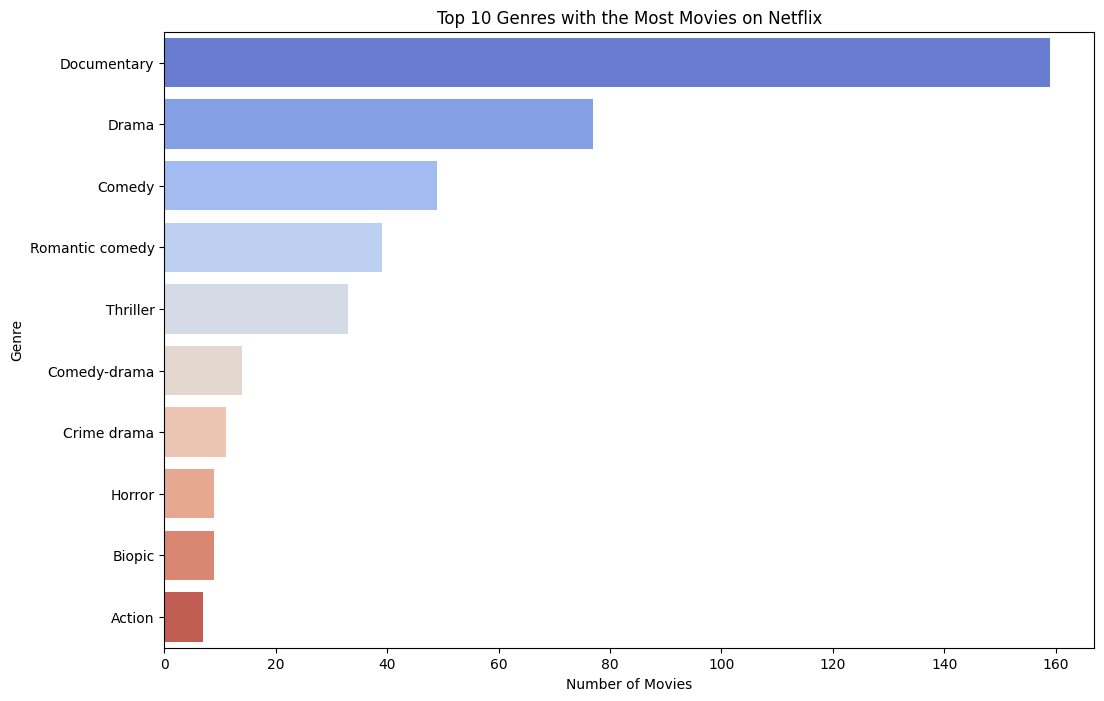

In [33]:
# Data
genre_count = netflix_data['genre'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_count.values, y=genre_count.index, palette='coolwarm')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.title('Top 10 Genres with the Most Movies on Netflix')
plt.show()


In [34]:
# Average IMDb score per genre
average_imdb_per_genre = netflix_data.groupby('genre')['imdb_score'].mean()
average_imdb_per_genre


genre
Action              5.414286
Action comedy       5.420000
Action thriller     6.400000
Action-adventure    7.300000
Action-thriller     6.133333
                      ...   
War                 6.750000
War drama           7.100000
War-Comedy          6.000000
Western             6.066667
Zombie/Heist        5.900000
Name: imdb_score, Length: 114, dtype: float64

<ipython-input-35-0b1e0a7327ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_imdb_per_genre.values, y=average_imdb_per_genre.index, palette='plasma')


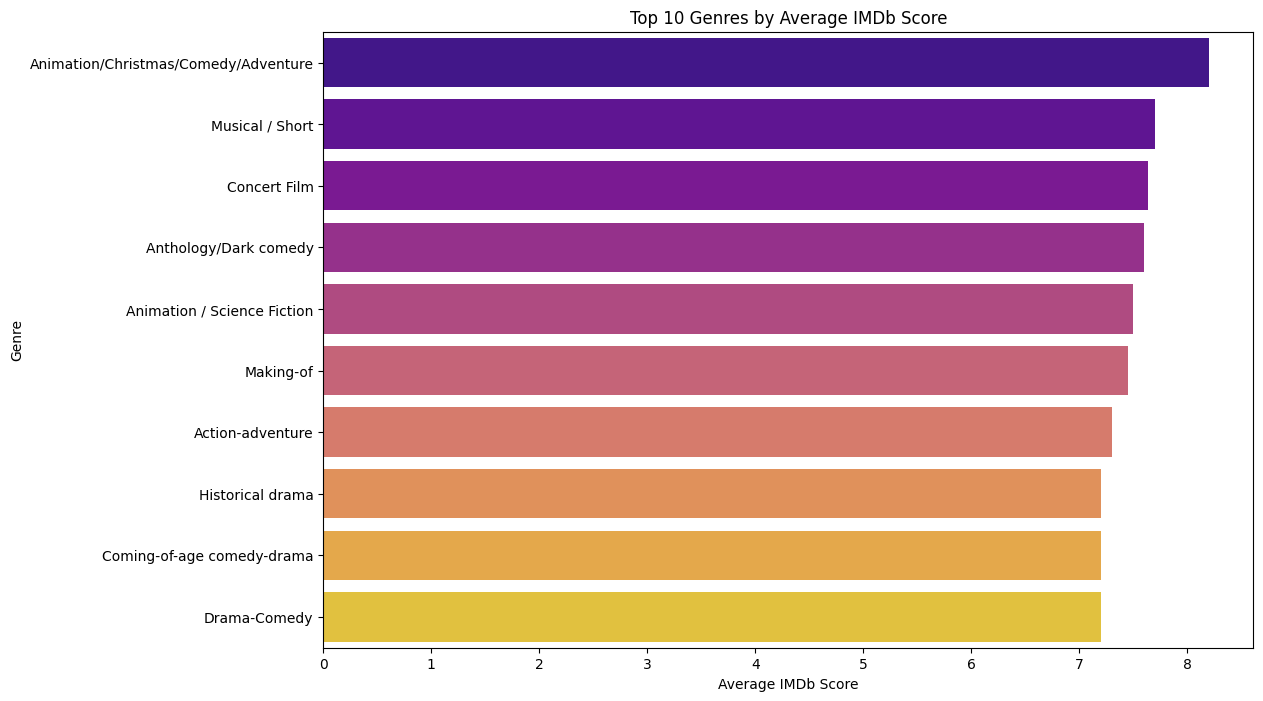

In [35]:
# Data
average_imdb_per_genre = netflix_data.groupby('genre')['imdb_score'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=average_imdb_per_genre.values, y=average_imdb_per_genre.index, palette='plasma')
plt.xlabel('Average IMDb Score')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average IMDb Score')
plt.show()


In [36]:
# Count of movies per year
movies_per_year = netflix_data['year'].value_counts().sort_index()
movies_per_year


year
2014      1
2015      9
2016     30
2017     66
2018     99
2019    125
2020    182
2021     71
Name: count, dtype: int64

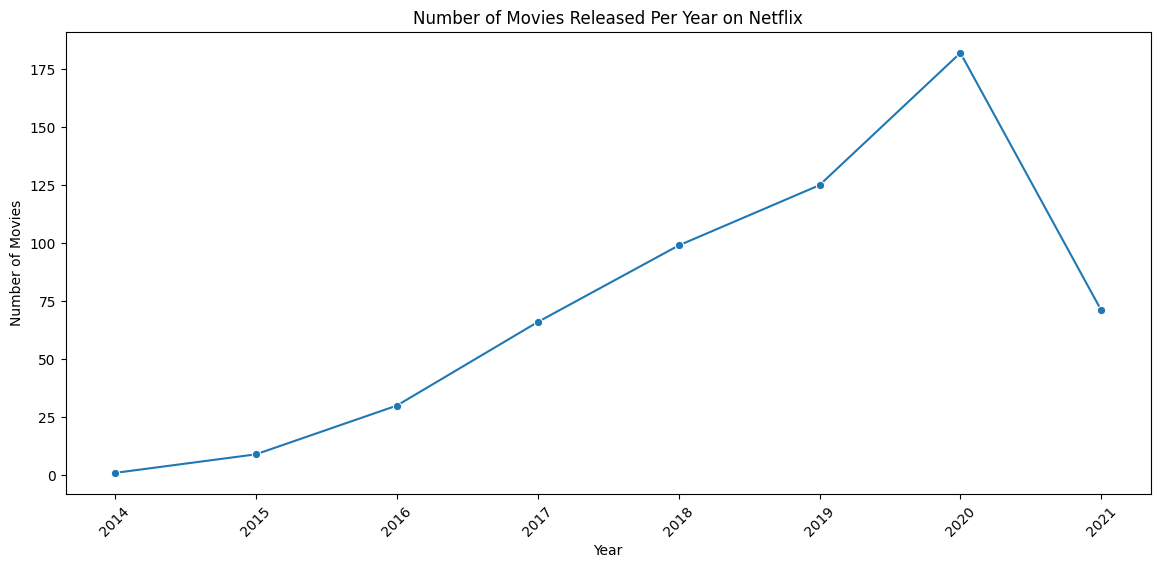

In [37]:
# Data
movies_per_year = netflix_data['year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Per Year on Netflix')
plt.xticks(rotation=45)
plt.show()


In [38]:
# Average runtime of movies
average_runtime = netflix_data['runtime'].mean()
average_runtime


93.49056603773585

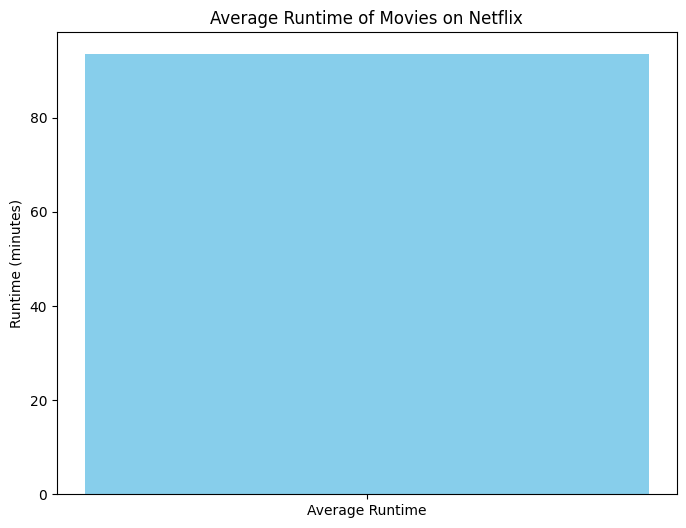

In [39]:
# Data
average_runtime = netflix_data['runtime'].mean()

# Plot
plt.figure(figsize=(8, 6))
plt.bar(['Average Runtime'], [average_runtime], color='skyblue')
plt.ylabel('Runtime (minutes)')
plt.title('Average Runtime of Movies on Netflix')
plt.show()


# **Time Series Analysis for Forecasting Trends and Seasonality**

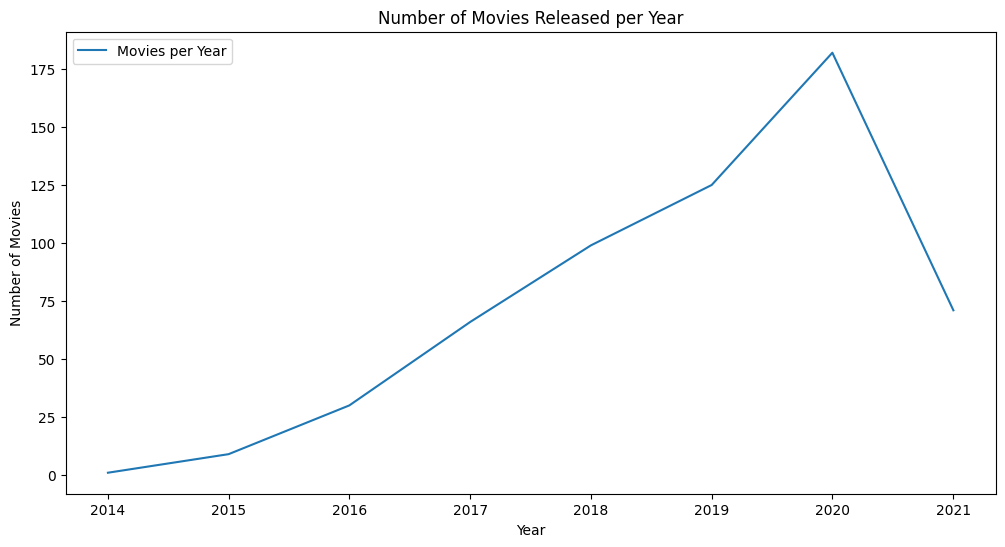

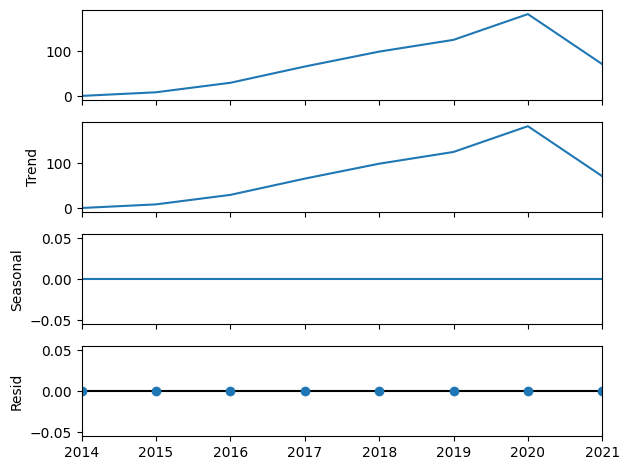

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


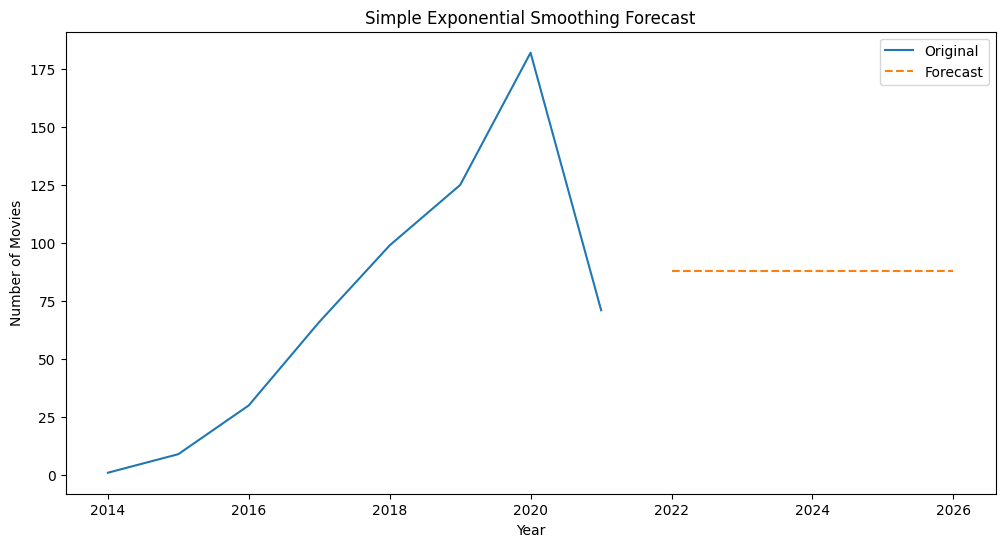

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Count the number of movies released per year
movies_per_year = netflix_data['year'].value_counts().sort_index()

# Convert to a DataFrame with datetime index
movies_per_year = movies_per_year.reset_index()
movies_per_year.columns = ['year', 'count']
movies_per_year['year'] = pd.to_datetime(movies_per_year['year'], format='%Y')
movies_per_year.set_index('year', inplace=True)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year, label='Movies per Year')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

# Decompose the time series data
decomposition = seasonal_decompose(movies_per_year, model='additive')
decomposition.plot()
plt.show()

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(movies_per_year).fit()
forecast = model.forecast(steps=5)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Simple Exponential Smoothing Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()

# **Sentiment Analysis or Text Mining on Unstructured Data**

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


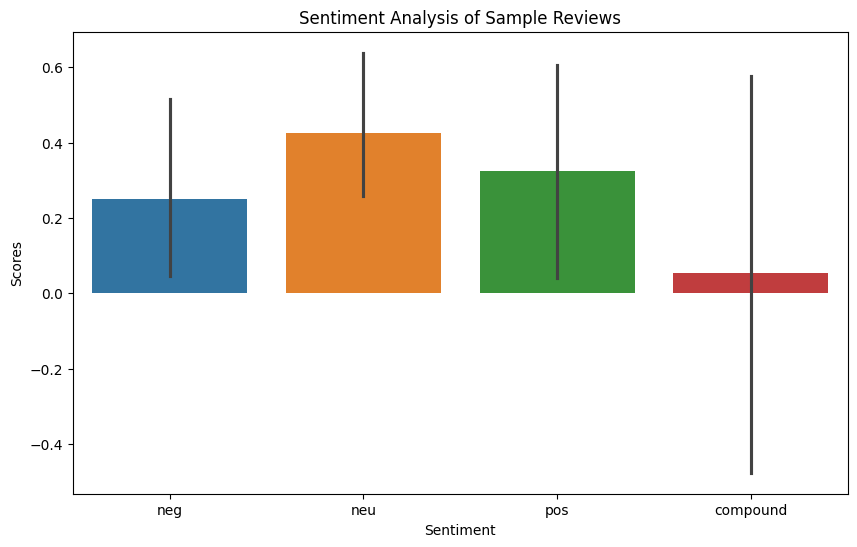

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns

# Sample review data
reviews = [
    "I love this movie. It's amazing!",
    "Terrible film. I hated it.",
    "It was an okay movie, nothing special.",
    "Absolutely fantastic! A must-watch.",
    "Not my cup of tea. The plot was boring.",
]

# Perform sentiment analysis
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

sentiments = [sid.polarity_scores(review) for review in reviews]
sentiments_df = pd.DataFrame(sentiments)

# Plot sentiment scores
plt.figure(figsize=(10, 6))
sns.barplot(data=sentiments_df)
plt.title('Sentiment Analysis of Sample Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Scores')
plt.show()


# **Clustering or Classification Techniques for Segmentation and Pattern Recognition**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


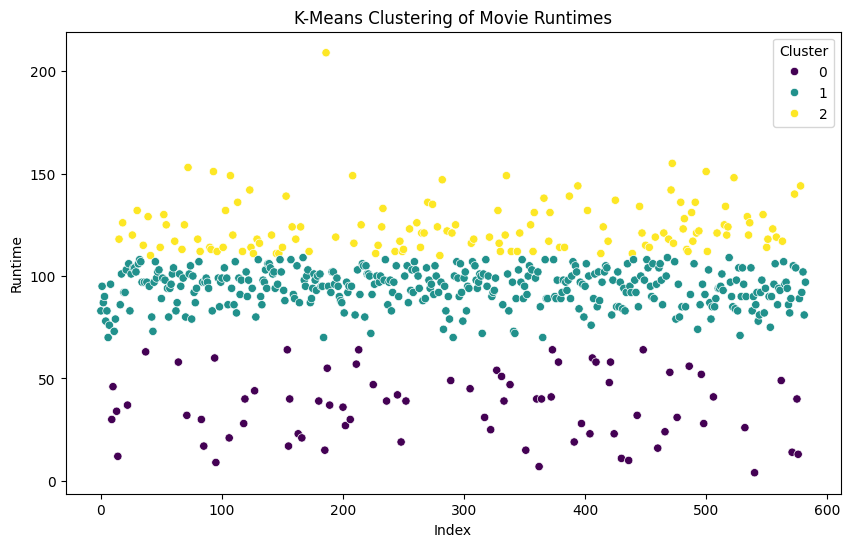

Cluster Centers (scaled): [[-2.06582222]
 [ 0.02793906]
 [ 1.11004047]]
Cluster Centers (original): [[ 36.30263158]
 [ 94.264     ]
 [124.21969697]]


In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Data preparation
runtime_data = netflix_data[['runtime']].dropna()

# Standardize the data
scaler = StandardScaler()
runtime_scaled = scaler.fit_transform(runtime_data)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(runtime_scaled)
runtime_data['cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=runtime_data.index, y='runtime', hue='cluster', data=runtime_data, palette='viridis')
plt.title('K-Means Clustering of Movie Runtimes')
plt.xlabel('Index')
plt.ylabel('Runtime')
plt.legend(title='Cluster')
plt.show()

# Print cluster centers
print("Cluster Centers (scaled):", kmeans.cluster_centers_)
print("Cluster Centers (original):", scaler.inverse_transform(kmeans.cluster_centers_))
